In [1]:
from __future__ import print_function, division

# Data Visualisation with the Seaborn library

`Seaborn` is a library written in the Python language which allows production of beautiful statistical plots with minimal coding required. 

It is part of the pandas, numpy and matplotlib ecosystem of data tools and best used together with IPython or even Jupyter notebooks, as is demonstrated here. Seaborn is best used as an exploratory tool; to get a quick feel of data. We find that Seaborn is best used as a tool to make compare distributions between categorical classes of data. 

In this talk, we will go through some of the capabilities of this library and some examples of its use in real life projects. 

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import re
%matplotlib inline
mpl.style.use("ggplot")

## Straightforward API

Seaborn's visualizations are created by making a single function call with the appropriate customizations passed as arguments to the function. 

In [137]:
dataPath = os.path.join(os.getcwd(), "FiveCitiesPMData")

In [142]:
dataFiles = os.listdir(dataPath)
dataFiles

['BeijingPM20100101_20151231.csv',
 'ChengduPM20100101_20151231.csv',
 'GuangzhouPM20100101_20151231.csv',
 'ShanghaiPM20100101_20151231.csv',
 'ShenyangPM20100101_20151231.csv']

In [152]:
df_dict = {}
for f in dataFiles:
    df = pd.read_csv(os.path.join("FiveCitiesPMData", f), index_col=0)
    pm_cols = df.filter(regex="PM").columns
    id_cols = df.columns.difference(pm_cols)
    print(pm_cols)
    df = df.melt(id_vars= id_cols, value_vars=pm_cols, var_name="Station", value_name="PM2.5Concentration")
    reg = re.search("\w+(?=PM)", f)
    city_name = reg.group(0)
    print("Load {}".format(city_name))
    df_dict[city_name] = df

PM_dataset = pd.concat(df_dict, names=["City"])
PM_dataset.sample(5)

Index(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post'], dtype='object')
Load Beijing
Index(['PM_Caotangsi', 'PM_Shahepu', 'PM_US Post'], dtype='object')
Load Chengdu
Index(['PM_City Station', 'PM_5th Middle School', 'PM_US Post'], dtype='object')
Load Guangzhou
Index(['PM_Jingan', 'PM_US Post', 'PM_Xuhui'], dtype='object')
Load Shanghai
Index(['PM_Taiyuanjie', 'PM_US Post', 'PM_Xiaoheyan'], dtype='object')
Load Shenyang


DEWP    HUMI  Iprec    Iws    PRES  TEMP cbwd  day  hour  \
City                                                                         
Shanghai  81817    9.0   71.85    0.0  42.00  1014.0  14.0   SE    3     1   
Beijing   154374  22.0   88.00    0.0   0.89  1006.0  24.0   cv   13     6   
          74206   19.0   73.00    0.8  32.64  1001.0  24.0   SE   19    22   
Chengdu   131742   0.0  100.00    0.0   2.00  1024.0   0.0   NW   12     6   
Guangzhou 142182  12.7   90.00    0.0   3.40  1013.8  14.4   NW   23     6   

                  month  precipitation  season  year          Station  \
City                                                                    
Shanghai  81817       5            0.0     1.0  2013       PM_US Post   
Beijing   154374      8            0.0     2.0  2015  PM_Nongzhanguan   
          74206       6            0.3     2.0  2012    PM_Dongsihuan   
Chengdu   131742      1            0.0     4.0  2013       PM_US Post   
Guangzhou 142182      3            0.0     1.0  2014       PM_US Post   

                  PM2.5Concentration  
City                                  
Shanghai  81817                 48.0  
Beijing   154374               112.0  
          74206                  NaN  
Chengdu   131742               280.0  
Guangzhou 142182                59.0

Source : https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities

In [160]:
plot_df = PM_dataset.dropna()

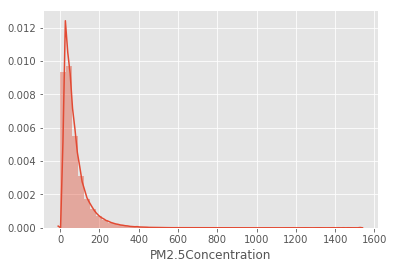

In [161]:
sns.distplot(plot_df["PM2.5Concentration"]);

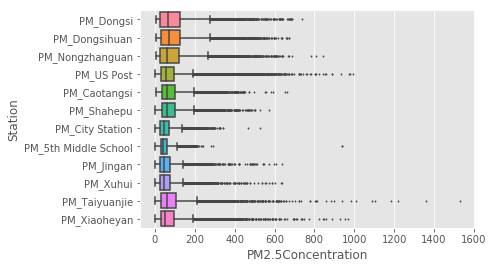

In [206]:
sns.boxplot(y="Station", x="PM2.5Concentration", data=plot_df, fliersize=1, saturation=1);

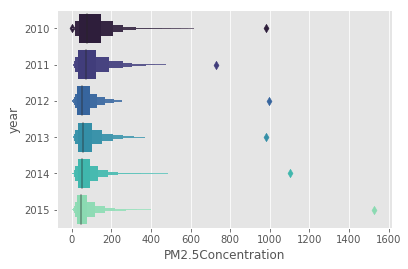

In [205]:
sns.lvplot(y="year", x="PM2.5Concentration", data=plot_df, orient="h", saturation=1,
          palette="mako", outlier_prop=1e-8)

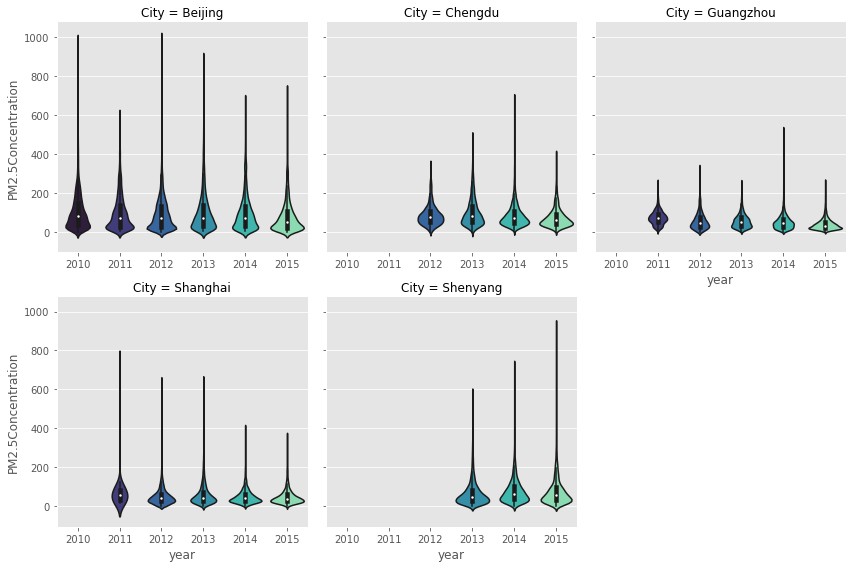

In [204]:
plot_uspost_readings = plot_df[plot_df.Station == "PM_US Post"].reset_index("City")

sns.factorplot("year", "PM2.5Concentration", data=plot_uspost_readings,
               col="City", col_wrap=3, kind="violin", palette="mako", sharex=False,
              saturation=1)

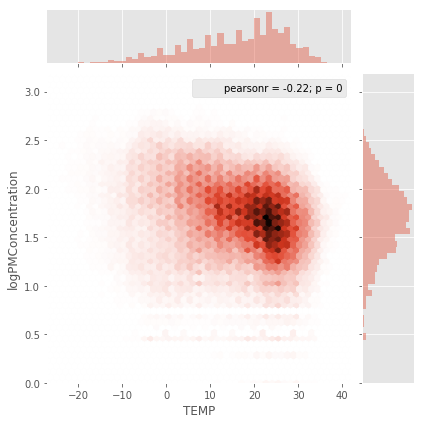

In [203]:
plot_df = plot_df.assign(logPMConcentration=np.log10(plot_df["PM2.5Concentration"]))
sns.jointplot("TEMP", "logPMConcentration", plot_df, kind="hex")

## Support for multiple plotting axes

Comparisons between multiple levels of categorical variables is also easy using Seaborn's many multi-plot functions. 

## Interaction with `matplotlib`

Seaborn is a high level interface to matplotlib. Hence, we can use matplotlib to further customize Seaborn visualizations. 

In [3]:
online_retail = pd.read_excel(os.path.join(os.getcwd(), "Online_Retail.xlsx"))
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



Source: https://archive.ics.uci.edu/ml/datasets/Online+Retail

In [129]:
online_retail.dropna()
online_retail["TotalSales"] = online_retail["Quantity"]*online_retail["UnitPrice"]

def make_yearmonth_col(x):
    if x.month >=10:
        return "%d-%d" % (x.year, x.month)
    else:
        return "%d-0%d" % (x.year, x.month)

online_retail["YearMonth"] = online_retail["InvoiceDate"].apply(make_yearmonth_col)

plot_df = (online_retail
            .query("TotalSales > 0")
            .groupby(["Country", "YearMonth", "InvoiceNo"], as_index=False)
            .agg({"TotalSales": np.sum})
            .assign(logTotalSales=lambda df: np.log10(df.TotalSales)))

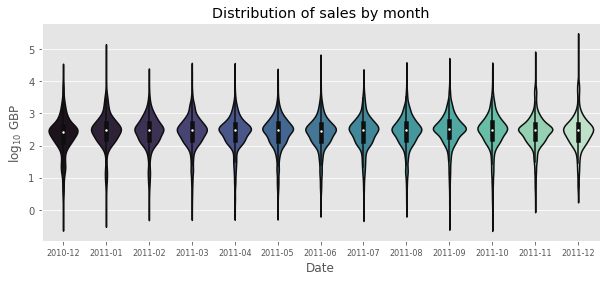

In [135]:
fig1, ax = plt.subplots(1,1, figsize=(10,4))
ax.set_title("Distribution of sales by month")
sns.violinplot("YearMonth", "logTotalSales",data=plot_df, ax=ax, palette="mako")
plt.setp(ax.get_xticklabels(), fontsize=8)
ax.set_xlabel("Date")
ax.set_ylabel("$\log_{10}$ GBP");

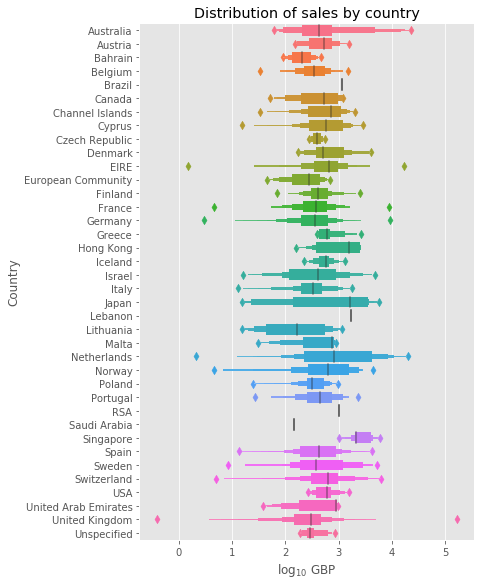

In [136]:
fig2 = plt.figure(figsize=(6, 9.5))
ax = fig2.add_subplot(111)
ax.set_title("Distribution of sales by country")
sns.lvplot(y="Country", x="logTotalSales", data=plot_df, saturation=1, palette="husl", outlier_prop=1e-8 )
ax.set_xlabel("$\log_{10}$ GBP")
ax.set_ylabel("Country");